In [7]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('Advertising.csv')

In [10]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
df.shape

(200, 5)

In [12]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [14]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [15]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

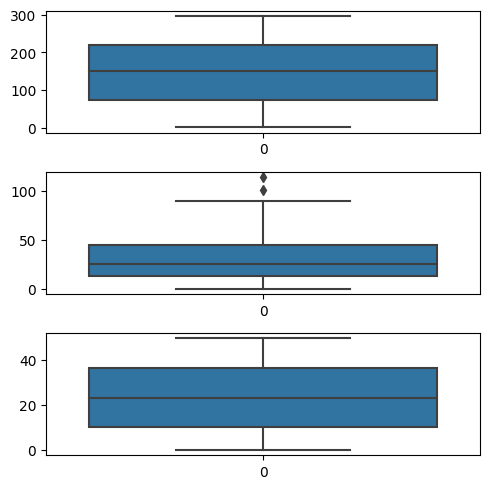

In [20]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot: xlabel='Newspaper', ylabel='Density'>

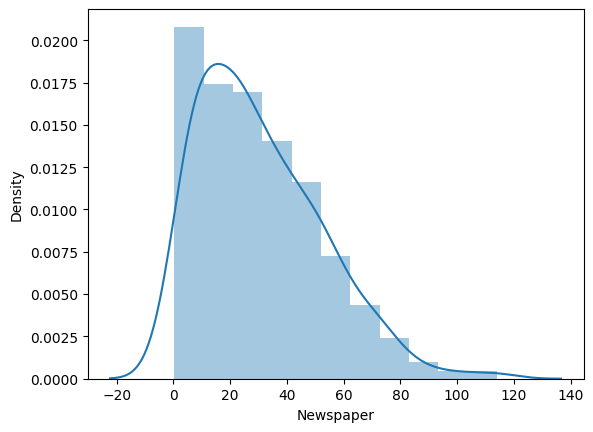

In [21]:
sns.distplot(df['Newspaper'])

In [23]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [24]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [26]:
data = df.copy()

In [29]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<AxesSubplot: >

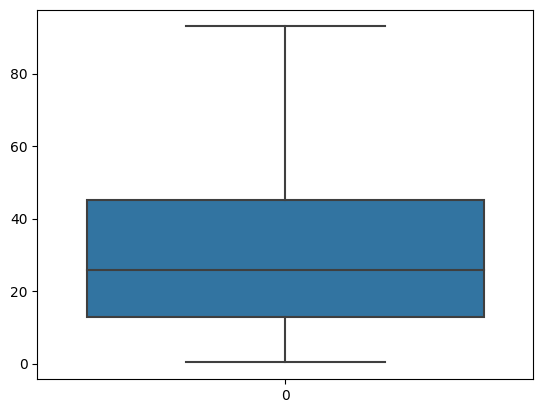

In [30]:
sns.boxplot(data['Newspaper'])

<AxesSubplot: >

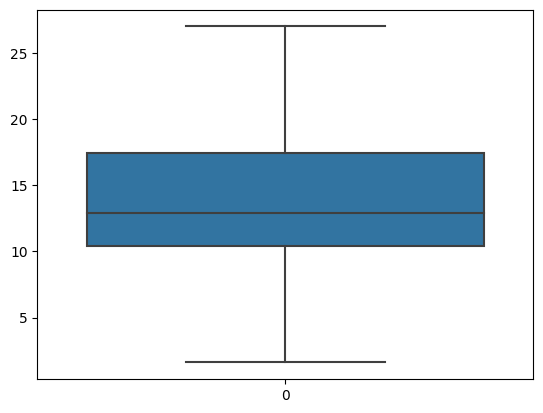

In [31]:
sns.boxplot(data['Sales'])

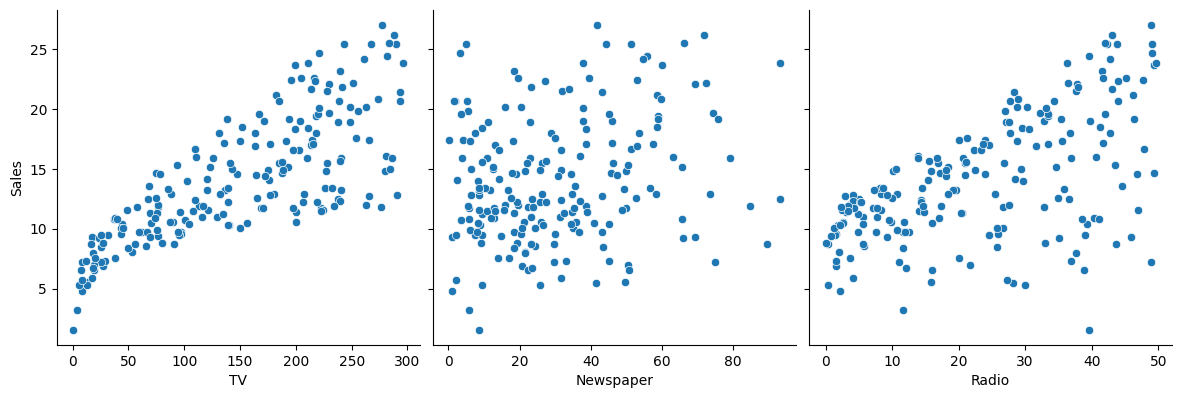

In [61]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
            y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

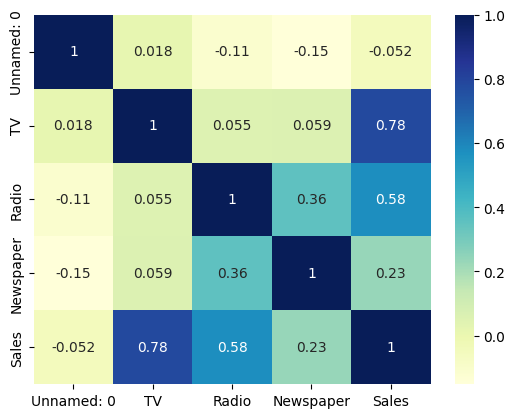

In [44]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [48]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [51]:
print(important_features)

['TV', 'Radio', 'Sales']


In [52]:
x=data['TV']
y=data['Sales']

In [53]:
x=x.values.reshape(-1,1)

In [54]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [55]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [56]:
print(x.shape,y.shape)

(200, 1) (200,)


In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.33)

In [64]:
print(X_train.shape,y_train.shape)

(134, 1) (134,)


In [65]:
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
     


In [66]:
knn = KNeighborsRegressor().fit(X_train, y_train)
knn

KNeighborsRegressor()

In [67]:
knn_train_pred = knn.predict(X_train)

In [68]:
knn_test_pred = knn.predict(X_test)

In [69]:
print(knn_train_pred, knn_test_pred)

[ 7.28 12.84 18.92  9.34 16.66 12.12 12.12 11.24 17.02  7.06 19.68  5.12
 12.08 12.08 17.34 18.2  12.48 14.54 12.48  8.4   8.4  16.58 18.92 19.1
 10.92 11.56 14.34 12.08  8.4  14.66  8.4  16.2  15.86 18.92 12.12 14.02
 12.08 16.26 14.66 14.66 13.1  11.12 16.66 17.54  5.92 14.66 14.46 10.12
  5.92 15.1  21.06 19.06 21.78  6.12 19.24  9.72 19.84 15.1   7.28  6.32
 15.7   6.32 20.9  12.08  8.06 17.42 14.02 15.1  10.2  10.12 15.48 10.12
 16.18 15.7  18.32  8.4  22.12 19.84 11.56 23.78 12.78 10.98 19.84 18.2
 11.56 16.44 16.18 15.1  19.84 19.8   9.72 18.34 11.12 15.3  19.68 15.1
  4.48 19.62  7.28 17.54  4.48 20.9  11.44 21.78 17.54 12.16 10.12 11.24
 12.02 11.12 16.26 12.16 15.7  19.1  17.54  9.34 17.34 17.54 14.02 15.1
  9.38 17.54 22.12 12.12 19.84 19.06 18.32 21.78 15.28 18.2  14.82 15.1
 17.02 17.54] [14.02 20.76 21.78  9.48 13.08 10.2   9.48 19.24 17.46  8.02 19.1  20.76
 12.12  7.28 10.34  9.48 20.94 20.94 12.08  7.06 13.34  8.02 13.72 16.44
 20.76 18.92 17.48 10.98  5.92 19.84 11.56

In [70]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])
     

In [71]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5704237597744684
RMSE: 3.1332856218159857


In [72]:
Results.head()
     

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.668946,0.570424,3.133286,0.098523


In [73]:
svr = SVR().fit(X_train,y_train)
svr
     

SVR()

In [74]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [75]:
print(svr_train_pred,svr_test_pred)

[ 7.63595084 11.92420154 18.25473     9.62450921 16.82915916 12.54201605
 12.36562344 11.75911419 16.92017115  7.47987083 17.5240791   7.29516758
 10.70258089 10.79511524 16.51037086 18.14506058 12.12572182 13.15141232
 12.12572182  8.23936504  7.95364547 17.69526263 18.21602148 17.29947562
 11.49581626 10.26712698 14.97161565 10.70749557  8.00914095 15.29148048
  8.04216925 17.84560541 17.81657319 18.21100653 12.56181927 13.32956492
 10.70749557 17.89860017 15.21822956 15.18446906 13.49984348 11.56992022
 16.78309187 15.73758169  7.35458847 15.29148048 13.2710014   8.8708144
  7.34151064 14.59697851 18.37166899 16.3214305  17.9621188   7.43686111
 18.46300464  9.4696288  18.51198014 13.82686532  7.61074188  7.35907843
 13.11214679  7.36134781 18.42672075 10.64321982  7.69987837 16.70032326
 13.33409675 13.83180944 11.64305412  9.16941505 18.06115707  8.96219884
 16.55830963 13.0003231  17.23952513  8.0950043  18.21479967 18.51395473
 10.2989748  18.30626294 12.24545367 10.17604012 18.

In [76]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.6292904827894317
RMSE: 2.9106951845042834


In [77]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.668946,0.570424,3.133286,0.098523
1,Support Vector Machine,0.585053,0.629290,2.910695,-0.044238


In [80]:
pip install statsmodels

     ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.0 MB 1.3 MB/s eta 0:00:08
     ---------------------------------------- 0.1/9.0 MB 435.7 kB/s eta 0:00:21
     ---------------------------------------- 0.1/9.0 MB 363.1 kB/s eta 0:00:25
     ---------------------------------------- 0.1/9.0 MB 245.8 kB/s eta 0:00:37
     ---------------------------------------- 0.1/9.0 MB 261.7 kB/s eta 0:00:35
     ---------------------------------------- 0.1/9.0 MB 261.7 kB/s eta 0:00:35
      --------------------------------------- 0.1/9.0 MB 242.7 kB/s eta 0:00:37
      --------------------------------------- 0.1/9.0 MB 232.7 kB/s eta 0:00:39
      --------------------------------------- 0.1/9.0 MB 243.4 kB/s eta 0:00:37
      --------------------------------------- 0.2/9.0 MB 235.4 kB/s eta 0:00:38
      --------------------------------------- 0.2/9.0 MB 238.1 kB/s eta 0:00:38
      --------------------------------------- 0.2/9

In [81]:
import statsmodels.api as sm

In [82]:
X_train_constant = sm.add_constant(X_train)

In [83]:
model = sm.OLS(y_train, X_train_constant).fit()

In [84]:
model.params

const    6.853618
x1       0.050119
dtype: float64

In [85]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     208.4
Date:                Sun, 05 Feb 2023   Prob (F-statistic):           6.22e-29
Time:                        12:24:14   Log-Likelihood:                -352.27
No. Observations:                 134   AIC:                             708.5
Df Residuals:                     132   BIC:                             714.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8536      0.590     11.609      0.0

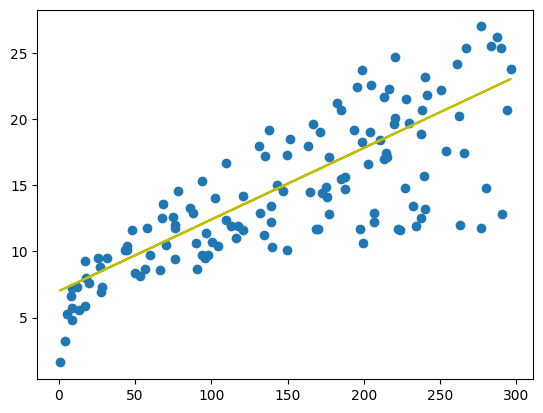

In [86]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [87]:
y_train_pred = model.predict(X_train_constant)
res = (y_train - y_train_pred)
res

166    0.249258
143   -1.696030
111    2.832701
182   -0.970287
185    5.472056
         ...   
104    1.908116
160   -1.099088
163    2.951980
43    -4.323170
100   -6.300009
Name: Sales, Length: 134, dtype: float64

In [88]:
y_train_pred

array([ 7.75074213, 12.09603033, 18.96729921,  9.67028697, 17.12794423,
       12.89291709, 12.6673831 , 11.88553194, 17.21815782,  7.51518441,
       17.86970046,  7.12425883, 10.67767213, 10.77289759, 16.82222038,
       18.75178895, 12.35664738, 13.62966146, 12.35664738,  8.43235596,
        8.13665585, 18.08019885, 18.88710935, 17.61409527, 11.55976062,
       10.25166348, 15.43894524, 10.68268399,  8.19679824, 15.72462163,
        8.23188131, 18.28067351, 18.24057858, 18.87708561, 12.91797642,
       13.83013611, 10.68268399, 18.3558515 , 15.65946736, 15.62939616,
       14.01557517, 11.64997422, 17.08283743, 16.12055907,  7.27461482,
       15.72462163, 13.76498185,  9.01373247,  7.24454362, 15.09813832,
       20.89686779, 16.64680505, 21.70879015,  7.44000641, 19.57373505,
        9.53496658, 20.23028955, 14.35638209,  7.71565906,  7.28463855,
       13.58455466,  7.28965042, 20.72145246, 10.61752973,  7.83594386,
       17.00264757, 13.83514798, 14.36139396, 11.74018781,  9.27

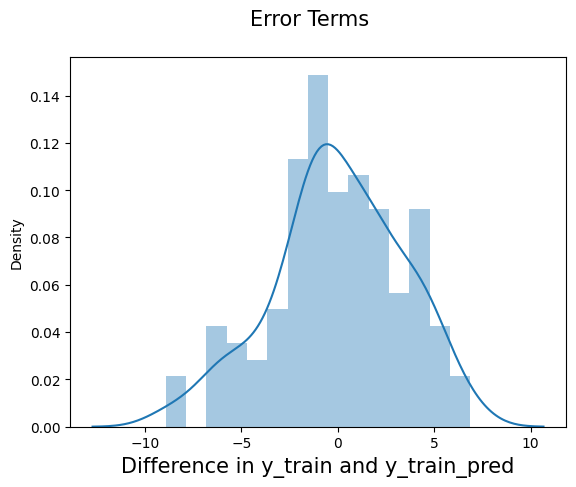

In [89]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

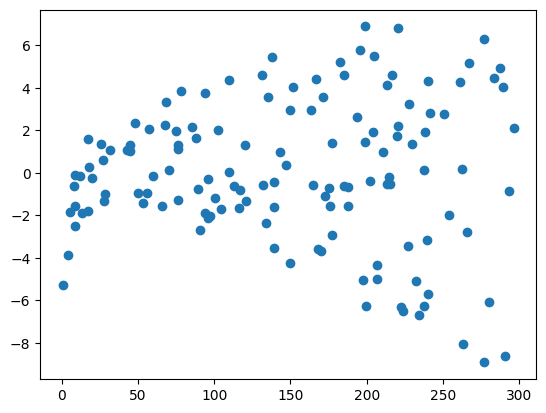

In [90]:
plt.scatter(X_train, res)
plt.show()

In [91]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)
     

In [92]:
y_pred

array([13.88526665, 17.79953433, 21.53337482,  8.70299675, 12.23636259,
       11.72515221,  8.75812728, 19.65392491, 15.91507255,  8.11159651,
       17.699297  , 17.76445127, 12.87788149,  7.70062347,  8.83330528,
        8.76815102, 21.10235431, 21.18755604, 10.62755346,  7.51017254,
       13.02322562,  8.04644225, 13.15353415, 17.35849008, 17.8045462 ,
       18.88710935, 17.41863248, 10.20655668,  7.21948429, 20.14508782,
       10.31180588,  9.97601083, 16.53654399, 19.04247721, 10.87313492,
       16.43129479, 20.57109647,  8.10658465, 16.2959744 , 15.03799593,
       11.22396557, 13.67978012, 10.532328  , 13.93538531, 18.3859227 ,
       18.17041245, 12.40175418, 19.32314173, 13.3389732 , 10.59748226,
       18.29570911, 10.32182961, 18.00000899,  7.82592013, 20.95701018,
        7.79584893, 14.70220087, 10.6375772 , 15.15326885, 20.92192712,
        9.0087206 , 19.30309426, 16.75706611, 18.87207375, 16.86732717,
        7.79083706])

In [93]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [94]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.048805568636121

In [95]:
r2 = r2_score(y_test, y_pred)
r2

0.5932760571329709

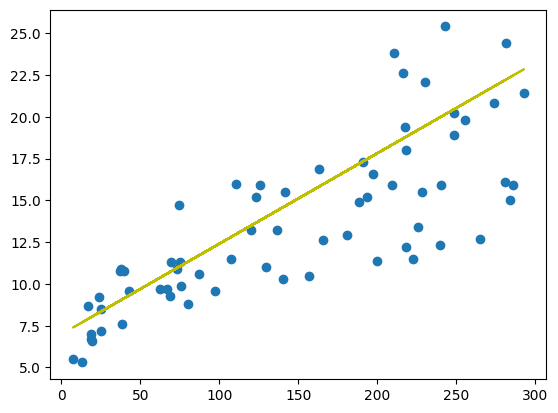

In [96]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()